In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\delivery_time.csv")

In [3]:
print(df)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


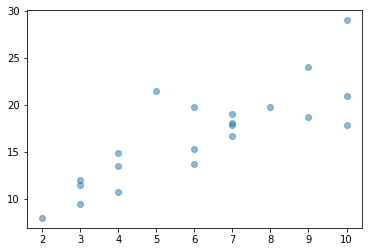

In [4]:
plt.scatter(df['Sorting Time'],df['Delivery Time'],alpha=0.5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

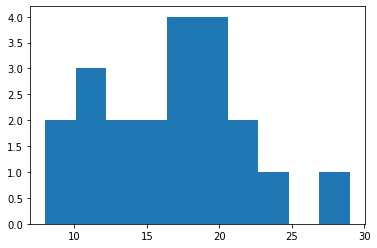

In [6]:
plt.hist(df['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19f6516a880>,
 'caps': [<matplotlib.lines.Line2D at 0x19f6516af40>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f6516a520>],
 'medians': [<matplotlib.lines.Line2D at 0x19f65179640>],
 'fliers': [<matplotlib.lines.Line2D at 0x19f651799a0>],
 'means': []}

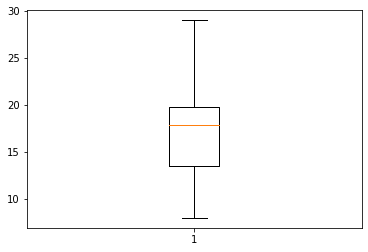

In [7]:
plt.boxplot(df['Delivery Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

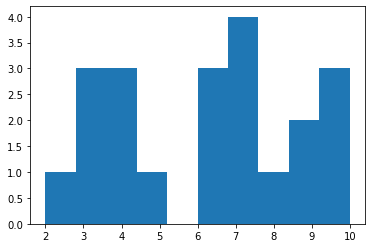

In [8]:
plt.hist(df['Sorting Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19f65250550>,
 'caps': [<matplotlib.lines.Line2D at 0x19f65250c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f652501f0>],
 'medians': [<matplotlib.lines.Line2D at 0x19f6525b310>],
 'fliers': [<matplotlib.lines.Line2D at 0x19f6525b670>],
 'means': []}

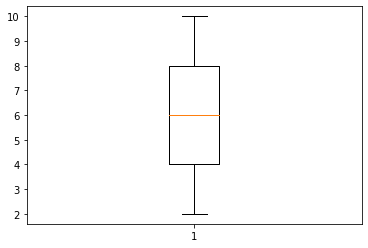

In [9]:
plt.boxplot(df['Sorting Time'])

In [10]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

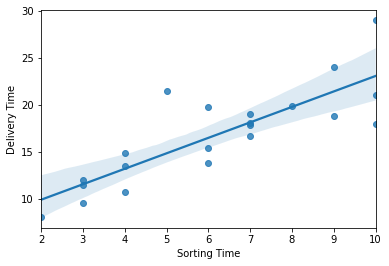

In [11]:
sns.regplot(x="Sorting Time",y="Delivery Time",data=df )

In [12]:
import statsmodels.formula.api as smf

In [13]:
df=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [14]:
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
import statsmodels.formula.api as smf

In [16]:
model=smf.ols("delivery_time~sorting_time",data=df).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        23:20:04   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [19]:
model.pvalues,model.tvalues

(Intercept       0.001147
 sorting_time    0.000004
 dtype: float64,
 Intercept       3.823349
 sorting_time    6.387447
 dtype: float64)

In [25]:
model.rsquared

0.6822714748417231

In [28]:
model.rsquared_adj

0.6655489208860244

In [20]:
new_data=pd.Series([1,5])

In [21]:
new_data

0    1
1    5
dtype: int64

In [22]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])

In [23]:
data_pred

,sorting_time
0,1
1,5


In [24]:
model.predict(data_pred)

0     8.231754
1    14.827833
dtype: float64

In [29]:
preds=model.predict(df.sorting_time)

In [32]:
preds

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [35]:
import numpy as np
np.sqrt(np.mean((df.delivery_time - preds)**2))

2.7916503270617654